In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

Consider the data and its initial partitions depicted below:

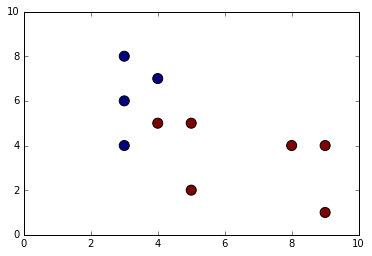

In [5]:
points = np.array([[3, 8], [4, 7], [3, 6], [3, 4],
                   [4, 5], [5, 5], [5, 2], [8, 4], [9, 4], [9, 1]])
partitions = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

colors = partitions / partitions.max()
plt.axis([0, 10, 0, 10])
plt.scatter(points[:, 0], points[:, 1], c=colors, s=100)
plt.show()

## a)
Apply the k-Means algorithm to find two clusters. Use the Manhattan distance as metric and
give the clustering results after each iteration of the algorithm, including the coordinates of the
cluster means.

In [10]:
def plot(data, classes, centers):
    colors = classes / classes.max()
    plt.clf()
    plt.axis([0, 10, 0, 10])
    plt.scatter(data[:, 0], data[:, 1], c=colors, s=100)
    plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=1000)
    plt.show()


def log(data, classes, centers):
    print('Points:')
    for index, point in enumerate(data):
        print('p: {0} | c: {1}'.format(point, classes[index]))
    print('\nCenters:\n', centers)
    print('\n=============\n')


def get_distances(points, centers):
    return np.sum(np.absolute(points[:, :, None] - centers.T[None, :, :]), axis=1)


def get_centers(points, assignment, k):
    centers = np.zeros((k, 2))
    for index, _ in enumerate(centers):
        mask = (assignment == index)
        centers[index] = np.mean(points[mask, :], axis=0)
    return centers


def kmeans(data, k):
    centers = 10 * np.random.rand(k, 2)
    previous_assignment = np.zeros(len(data))

    # Initial assignment for this task
    assignment = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    centers = get_centers(data, assignment, k)
    log(data, assignment, centers)

    while True:
        distances = get_distances(data, centers)
        assignment = np.argmin(distances, axis=1)
        if np.array_equal(previous_assignment, assignment):
            break
        centers = get_centers(data, assignment, k)
        previous_assignment = assignment
        log(data, assignment, centers)

    return assignment, centers

Points:
p: [3 8] | c: 0
p: [4 7] | c: 0
p: [3 6] | c: 0
p: [3 4] | c: 0
p: [4 5] | c: 1
p: [5 5] | c: 1
p: [5 2] | c: 1
p: [8 4] | c: 1
p: [9 4] | c: 1
p: [9 1] | c: 1

Centers:
 [[ 3.25        6.25      ]
 [ 6.66666667  3.5       ]]


Points:
p: [3 8] | c: 0
p: [4 7] | c: 0
p: [3 6] | c: 0
p: [3 4] | c: 0
p: [4 5] | c: 0
p: [5 5] | c: 0
p: [5 2] | c: 1
p: [8 4] | c: 1
p: [9 4] | c: 1
p: [9 1] | c: 1

Centers:
 [[ 3.66666667  5.83333333]
 [ 7.75        2.75      ]]




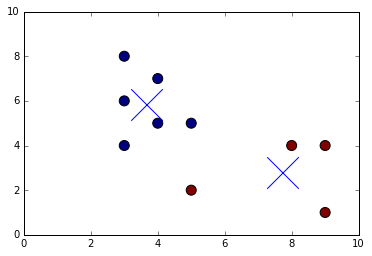

In [11]:
classes, centers = kmeans(points, k=2)
plot(points, classes, centers)

---

## b)
k-Means is often used to find initial parameters for a Gaussian Mixture Model (GMM) clustering.
These parameters are then refined with the EM algorithm. Determine the initial GMM parameters
$π1$, $µ1$, $Σ1$ and $π2$, $µ2$, $Σ2$ for the two clusters C1 and C2 obtained in (a).